In [39]:
import kagglehub
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\enrik\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [3]:
archivo = r"C:\Users\enrik\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(archivo)

In [4]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [5]:
# Part 1

In [6]:
freq_table_cat = df["category"].value_counts() #Frecuency table of categories
freq_table_cat

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [7]:
# Sports, Beauty, Handmade Clothing, Shoes & Accessories, Bath & Body and Birthday Gifts are the top 5 product categories

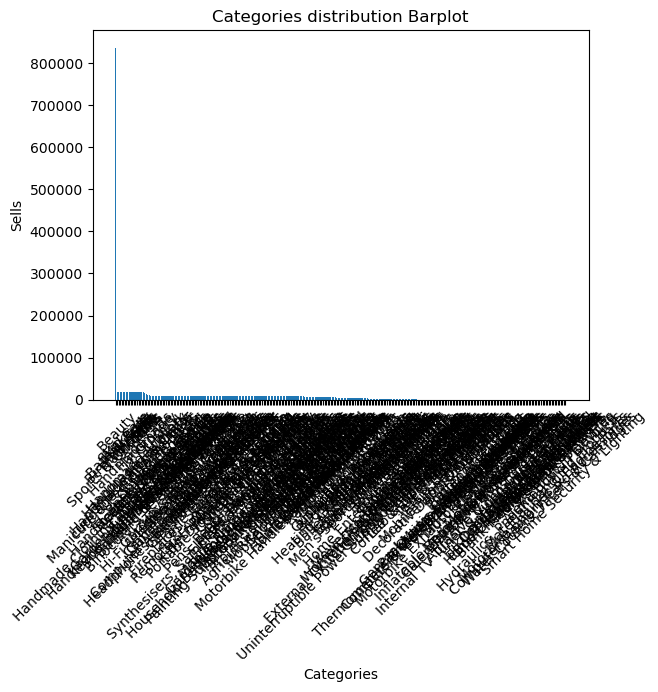

In [8]:
#Visualizations of product categories
plt.bar(freq_table_cat.index, freq_table_cat.values)
plt.title('Categories distribution Barplot')
plt.xlabel('Categories')
plt.ylabel('Sells')
plt.xticks(rotation=45) 
plt.show()       # no se puede ver al haber tantas categorías, por lo que usaremos un subset de top categories

In [9]:
cat_subset = df["category"].value_counts().head(5)

In [10]:
cat_subset

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

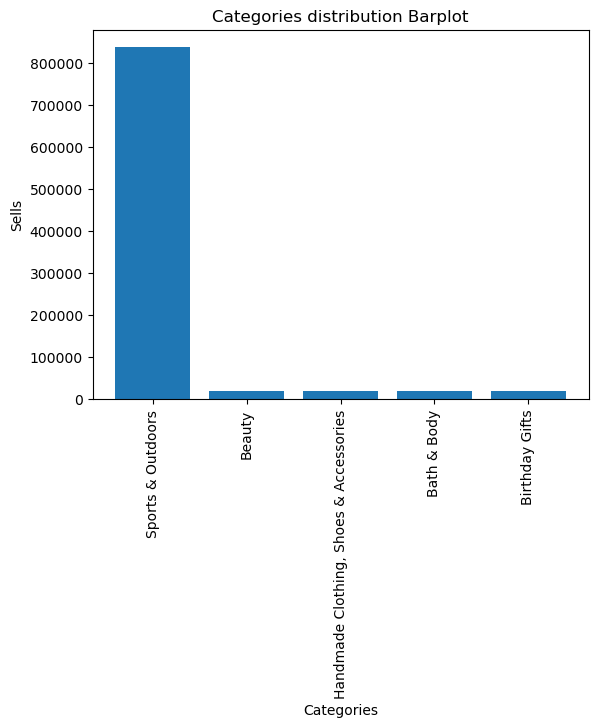

In [14]:
plt.bar(cat_subset.index, cat_subset.values)
plt.title('Categories distribution Barplot')
plt.xlabel('Categories')
plt.ylabel('Sells')
# plt.yticks(range(0, 50000))      no carga esta opción
plt.xticks(rotation=90) 
plt.show() 

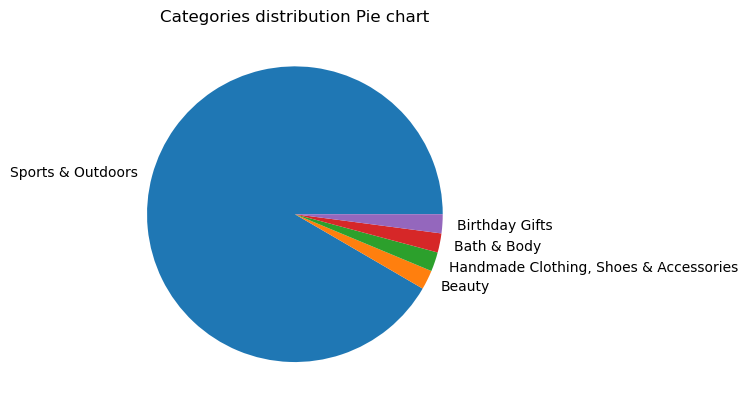

In [18]:
# Pie Chart
plt.pie(cat_subset.values, labels= cat_subset.index)
plt.title('Categories distribution Pie chart')
plt.show()

# Part 2

In [21]:
# Measures of Centrality
df.price.mean()

89.24380943923663

In [23]:
df.price.median()

19.09

In [25]:
df.price.mode()

0    9.99
Name: price, dtype: float64

In [29]:
# Los productos tienen un precio medio de 89 euros, siendo 9.99 euros el precio que más se repite. La mediana es 19.09 euros
# lo que significa que la mayoría de productos son baratos y existen algunos con precios mucho más elevados que hacen que suba la media

In [31]:
# the average price point of products listed is 19. The majority of products cost 9.99 but there might be lot of products of 20 euros
# and also a considerable amount of prices higher than 20 euros

In [33]:
# Measures of dispersion

In [35]:
prices = df.price

In [41]:
np.var(prices)

119445.43644263712

In [43]:
np.std(prices)

345.60879103783964

In [45]:
price_range = prices.max() - prices.min()

In [47]:
price_range

100000.0

In [51]:
prices.min()

0.0

In [55]:
# Interquantile range (IQR)
q1 = prices.quantile(0.25)
q3 = prices.quantile(0.75)
IQR = q3 - q1
IQR

36.0

In [ ]:
# Variance is 119.445 euros, standard deviation 345 euros (we can see that there are lot of products of different prices and there is difference in the
# distributions of their prices), IQR is 36 euros and the range of prices 100.000
# however we checked the range, and the most expensive product costs 100.000 and the cheapest is free, let´s have a look at them

In [61]:
df[df.price == 0] #los productos  gratis son libros, imaginamos que el usuario tiene alguna suscripción a Prime

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
342871,367018,B07TYXW54L,Exercises with Resistance Loop Bands: 40+ Exer...,4.1,94,0.0,False,0,Sports & Outdoors
546823,589599,B003WL4O38,Operation Mincemeat: The True Spy Story that C...,4.5,5795,0.0,False,0,PC & Video Games
547321,590132,B005KKRRVK,Kensuke’s Kingdom,4.7,4565,0.0,False,0,PC & Video Games
547507,590332,B09WRXGQZL,"Faith, Hope and Carnage",4.7,546,0.0,False,0,PC & Video Games
794353,855945,B07T7L39TN,Never Split the Difference: Negotiating as if ...,4.6,39112,0.0,True,0,School & Educational Supplies
830446,905582,B00E3SYBWS,"Go for the Gold, Atalanta! (Myth-O-Mania Book 8)",4.7,190,0.0,False,0,Games & Game Accessories
830795,905932,B0BJQQZ79H,Battle of the Fang: Space Marine Battles: Warh...,4.6,166,0.0,False,0,Games & Game Accessories
833556,908772,B07YGP8442,100 Years of Leeds United,4.8,1349,0.0,False,0,Games & Game Accessories
836136,911439,B0BLFPRMZH,"Dungeons & Guardians: Battleborne, Book III",4.7,2421,0.0,False,0,Games & Game Accessories
1025782,1134431,B0BL8LQCHZ,"4 in 1 Bundle Off the Grid Survival Book, Prep...",4.3,5,0.0,False,0,Sports & Outdoors


In [69]:
df[df.price == 100000] # it has to be an error, because this product is a treadmill

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2008013,2259336,B091F5Y3CT,HB FBA Test Treadmill,0.0,0,100000.0,False,0,Sports & Outdoors


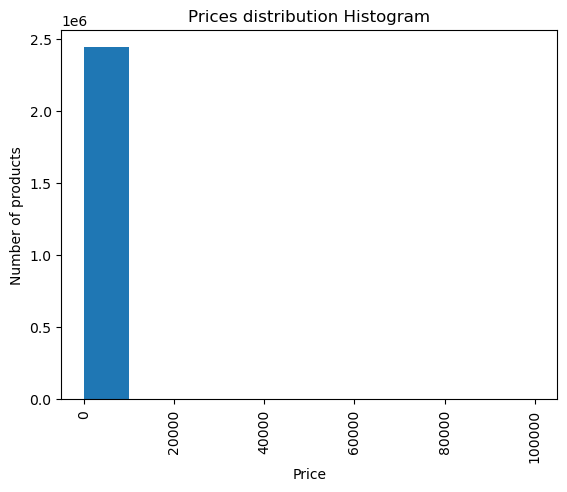

In [71]:
# Histogram
plt.hist(prices)
plt.title('Prices distribution Histogram')
plt.xlabel('Price')
plt.ylabel('Number of products')
plt.xticks(rotation=90) 
plt.show()

In [ ]:
# with a histogram, we cannot appreciate the distribution of prices as we cannot see the ouliers. Also it could be improved by adding more bins and scaling the values
#using a scatterplot or another type of visualization

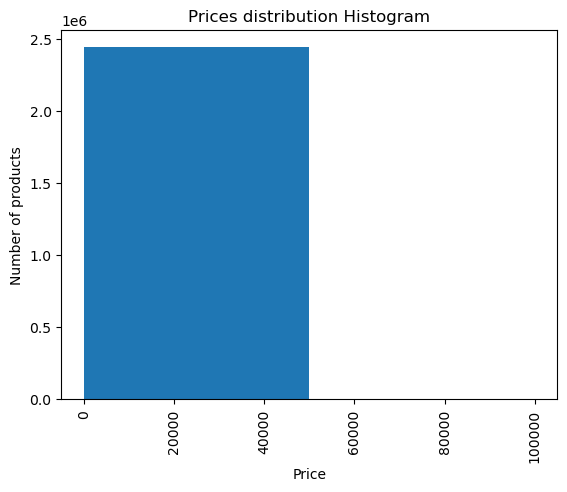

In [77]:
# Histogram
plt.hist(prices, bins = 2)
plt.title('Prices distribution Histogram')
plt.xlabel('Price')
plt.ylabel('Number of products')
plt.xticks(rotation=90) 
plt.show()

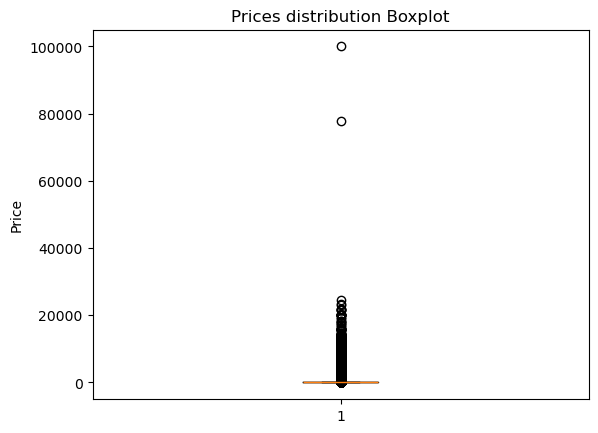

In [87]:
plt.boxplot(prices)
plt.title('Prices distribution Boxplot')
plt.ylabel("Price")
plt.show()

In [ ]:
# we can observe that there are products from a range of 0 and 20.000 euros. From there, we only see 2 outliers of very expensive products

# Part 3

In [ ]:
# Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [ ]:
# Measures of Centrality

In [90]:
ratings = df.stars

In [104]:
mean_rating = ratings[ratings > 0.0].mean() #filtramos por aquellos valores que han sido calificados, es decir, mayores que 0, aunque perdemos aquellos usuarios que valoraron 0 estrellas
mean_rating

4.31916076222691

In [108]:
median_ratings = ratings[ratings > 0].median()
median_ratings

4.4

In [112]:
mode_ratings = ratings[ratings > 0].mode()
mode_ratings

0    4.5
Name: stars, dtype: float64

In [ ]:
# we can see that the mode is 4.5 as it is a default value as it can also be 4 stars, 5 or 3.5
# the media is 4.3 and the value on the middle (median) is 4.4
# probably, people tend to rate 5 or 4 stars if they enjoy the product, and there must not be much rates of 1, 2 and 3 stars, just
# the enough amount to lower the most rated value (4.5)

In [ ]:
# Measures of dispersion

In [114]:
np.var(ratings)

4.8174320583535915

In [116]:
np.std(ratings)

2.194864929409915

In [120]:
ratings_range = ratings.max() - ratings.min()
ratings_range

5.0

In [122]:
# Interquantile range (IQR)
q1 = ratings.quantile(0.25)
q3 = ratings.quantile(0.75)
IQR = q3 - q1
IQR

4.4

In [ ]:
# by looking at the results, we can claim that from 1 rating to another, there is usually 2 stars of difference
# there are also ratings of all kind, 5 stars(maximum) and 0 or 0.5 (minimum), that´s why the range is big
# the IQR shows that there are many high ratings and also many not rated and/or low ratings

In [124]:
# Skewness and Kurtosis

In [126]:
from scipy.stats import skew, kurtosis

In [128]:
skewness = ratings.skew()
skewness

0.08120735761080985

In [ ]:
# A skewness of 0.08 indicates a distribution almost symmetrical, with presence of a small right tell, that is, barely positive skew

In [130]:
kurtosis = ratings.kurtosis()
kurtosis

-1.9260061280432985

In [ ]:
# This value indicates that there are no outliers or tails in the distribution. It is a pretty plain distribution

In [ ]:
# Visualization

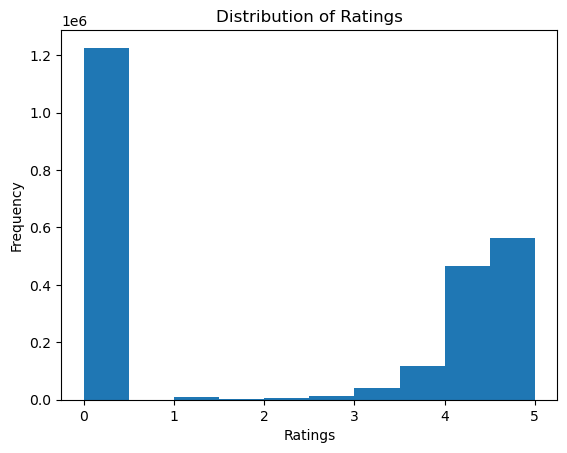

In [134]:
plt.hist(ratings, bins = 10)
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency") 
plt.show()

In [ ]:
# We can observe that there is a tendency to higher rates. Those who rate tend to use the 5 or 4 stars button
# on the other hand, there are many people who do not rate or rate 0 stars and there are some ratings (few ones) of 1,2 or 3 stars
# In conclusion, we can see that the distribution is very extreme, that is, ratings are either very good or very bad, and most people tend to rate good